## Multiple Linear Regression - log - log
---

In this notebook we will make a model to preview the value of houses <br>
train - base

1. [Obtaining data and importing libraries](#t1.)
2. [Data Quality & missing values](#t2.)
3. [PCA - Pricipal Componet Analysis](#t3.)
4. [Multiple Linear Regression](#t4.)

<a id="t1."></a>
### 1. Obtaining data and importing libraries

In [645]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [646]:
df = pd.read_csv('Data/train.csv')

In [647]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [648]:
df.shape

(1460, 81)

<a id="t2."></a>
### 2.Data Quality & missing values

Text(0.5, 0, 'House Sales Price')

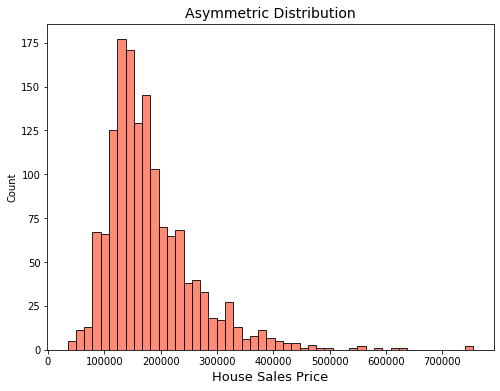

In [649]:
# we could see in this graph a asymmetric normal distribution, so we can try use ln to correct this asymmetric
plt.figure(figsize = (8,6))
sns.histplot(df['SalePrice'], color = 'tomato')
plt.title('Asymmetric Distribution', fontdict = {'fontsize': 14})
plt.xlabel('House Sales Price', fontdict = {'fontsize': 13})

### Missing Values
- Verify missing values
- Remove values with missing data > 20%
- replace number missing values for mean features

#### Verify missing Values

In [650]:
def null_columns(df):
    null_values = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)
    return null_values

In [651]:
null_values = null_columns(df)
len(null_values)

19

In [652]:
null_ratio = null_values / df.shape[0]
null_ratio[null_ratio > 0.2]


PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

#### Remove values with missing data > 20%

In [653]:
df.drop(null_ratio[null_ratio > 0.2].index, axis = 1, inplace = True )

In [654]:
null_values = null_columns(df)

In [655]:
print(f'Still have {len(null_values)} columns with null values')

Still have 14 columns with null values


#### Replace number missing values for mean features

In [656]:
for column in null_values.index:
    if df[column].dtype != object:
        df[column].fillna(df[column].mean(), inplace=True)

In [657]:
null_values = null_columns(df)
print(f'Still have {len(null_values)} columns with null values')

Still have 11 columns with null values


#### Fill categoric missing values with most frequent

In [658]:
for column in null_values.index:
    most_frequent = df[column].value_counts().index[0]
    df[column] = df[column].fillna(most_frequent)

In [659]:
null_values = null_columns(df)
print(f'Still have {len(null_values)} columns with null values')

Still have 0 columns with null values


#### Categorical data to numeric

In [660]:
df.shape

(1460, 76)

In [661]:
df = pd.get_dummies(df, drop_first = True)

#### Removing Outliers

In [662]:
df.shape

(1460, 234)

In [663]:
from sklearn.ensemble import IsolationForest

In [664]:
clf = IsolationForest(max_samples=150)
clf.fit(df)
y_pred_train = clf.predict(df)

In [665]:
np.unique(y_pred_train)

array([-1,  1])

In [666]:
y_pred_train.sum()

1438

In [667]:
df = df[y_pred_train == 1]

In [668]:
df.shape

(1449, 234)

<a id="t3."></a>
### 3. PCA - Pricipal Componet Analysis

In [669]:
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

In [670]:
scaler = StandardScaler()

In [671]:
X_pad  = scaler.fit_transform(X)

In [672]:
pca = PCA(0.9)
X_pad = pca.fit_transform(X_pad)

Text(0.5, 1.0, 'Explained varience ratio')

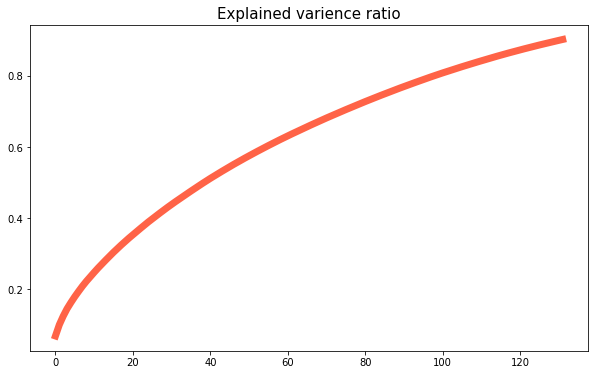

In [673]:
plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'tomato', linewidth = 7)
plt.title('Explained varience ratio', fontdict = {'fontsize': 15})

In [674]:
pca.n_components_

132

#### Log - Log conversion to reduce features before PCA

In [675]:
X = np.log(X)
y = np.log(y)

C:\Users\felip\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [676]:
# # Correct infinity values for X
X [ X == -np.inf] = 0

#### PCA

In [677]:
scaler = StandardScaler()
X_pca  = scaler.fit_transform(X)
pca = PCA(0.99)
X_pca = pca.fit_transform(X_pca)
pca.n_components_

34

Text(0.5, 1.0, 'Explained varience ratio')

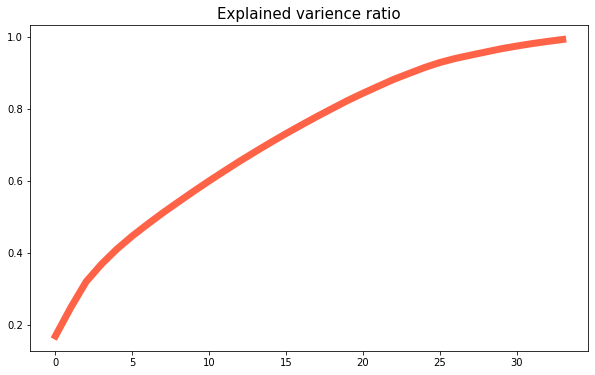

In [678]:
plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'tomato', linewidth = 7)
plt.title('Explained varience ratio', fontdict = {'fontsize': 15})

<a id="t4."></a>
### 4. Multiple Linear Regression

In [679]:
lr = LinearRegression().fit(X_pca, y)

In [680]:
lr.score(X_pca, y)

0.8783487735554502

### Stats Models

In [681]:
X_pca = pd.DataFrame(X_pca, columns = ['PC' + str(i) for i in range(1,pca.n_components_ + 1)])

In [682]:
x = sm.add_constant(X_pca)

In [683]:
y = y.reset_index(drop= True)

In [684]:
model = sm.OLS(y, x).fit()

In [685]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:54:17   Log-Likelihood:                 809.25
No. Observations:                1449   AIC:                            -1549.
Df Residuals:                    1414   BIC:                            -1364.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0257      0.004   3266.795      0.000      12.018      12.033
PC1           -0.1405      0.001    -95.354      0.000      -0.143      -0.138
PC2           -0.0052      0.002     -2.394      0.017      -0.009      -0.001
PC3            0.0299      0.002     13.234      0.000       0.025       0.034
PC4           -0.0043      0.003     -1.568      0.117      -0.010       0.001
PC5            0.0581      0.003     19.619      0.000       0.052       0.064
PC6           -0.0068      0.003     -2.151      0.032      -0.013      -0.001
PC7            0.0103      0.003      3.079      0.002       0.004       0.017
PC8           -0.0040      0.003     -1.185      0.236      -0.011       0.003
PC9           -0.0193      0.003     -5.527      0.000      -0.026      -0.012
PC10           0.0032      0.004      0.913      0.362      -0.004       0.010
PC11          -0.0031      0.004     -0.855      0.393      -0.010       0.004
PC12          -0.0132      0.004     -3.631      0.000      -0.020      -0.006
PC13           0.0089      0.004      2.421      0.016       0.002       0.016
PC14           0.0300      0.004      7.994      0.000       0.023       0.037
PC15           0.0385      0.004     10.179      0.000       0.031       0.046
PC16           0.0147      0.004      3.823      0.000       0.007       0.022
PC17           0.0014      0.004      0.366      0.715      -0.006       0.009
PC18           0.0084      0.004      2.123      0.034       0.001       0.016
PC19          -0.0107      0.004     -2.638      0.008      -0.019      -0.003
PC20          -0.0144      0.004     -3.531      0.000      -0.022      -0.006
PC21       -9.362e-05      0.004     -0.022      0.982      -0.008       0.008
PC22           0.0180      0.004      4.135      0.000       0.009       0.027
PC23          -0.0194      0.004     -4.425      0.000      -0.028      -0.011
PC24          -0.0197      0.005     -4.192      0.000      -0.029      -0.011
PC25          -0.0004      0.005     -0.089      0.929      -0.010       0.009
PC26           0.0129      0.005      2.516      0.012       0.003       0.023
PC27           0.0690      0.006     12.081      0.000       0.058       0.080
PC28          -0.0028      0.006     -0.450      0.653      -0.015       0.010
PC29          -0.0037      0.006     -0.579      0.563      -0.016       0.009
PC30          -0.0114      0.006     -1.773      0.076      -0.024       0.001
PC31          -0.0361      0.007     -5.143      0.000      -0.050      -0.022
PC32           0.0384      0.007      5.231      0.000       0.024       0.053
PC33          -0.0267      0.008     -3.435      0.001      -0.042      -0.011
PC34           0.0021      0.008      0.259      0.796      -0.014       0.018
==============================================================================
Om

In [691]:
x_reduced = X_pca.drop(['PC4','PC6','PC8', 'PC10', 'PC11', 'PC14', 'PC18', 'PC21', 'PC25', 'PC28', 'PC29', 'PC30', 'PC34' ], axis = 1)
x = sm.add_constant(x_reduced)

In [692]:
model = sm.OLS(y,x).fit()

In [693]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     459.9
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:56:31   Log-Likelihood:                 768.30
No. Observations:                1449   AIC:                            -1493.
Df Residuals:                    1427   BIC:                            -1376.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0257      0.004   3190.334      0.000      12.018      12.033
PC1           -0.1405      0.002    -93.122      0.000      -0.144      -0.138
PC2           -0.0052      0.002     -2.338      0.020      -0.009      -0.001
PC3            0.0299      0.002     12.924      0.000       0.025       0.034
PC5            0.0581      0.003     19.160      0.000       0.052       0.064
PC7            0.0103      0.003      3.007      0.003       0.004       0.017
PC9           -0.0193      0.004     -5.397      0.000      -0.026      -0.012
PC12          -0.0132      0.004     -3.546      0.000      -0.020      -0.006
PC13           0.0089      0.004      2.364      0.018       0.002       0.016
PC15           0.0385      0.004      9.941      0.000       0.031       0.046
PC16           0.0147      0.004      3.734      0.000       0.007       0.022
PC17           0.0014      0.004      0.357      0.721      -0.006       0.009
PC19          -0.0107      0.004     -2.576      0.010      -0.019      -0.003
PC20          -0.0144      0.004     -3.449      0.001      -0.023      -0.006
PC22           0.0180      0.004      4.038      0.000       0.009       0.027
PC23          -0.0194      0.004     -4.321      0.000      -0.028      -0.011
PC24          -0.0197      0.005     -4.094      0.000      -0.029      -0.010
PC26           0.0129      0.005      2.457      0.014       0.003       0.023
PC27           0.0690      0.006     11.798      0.000       0.058       0.080
PC31          -0.0361      0.007     -5.022      0.000      -0.050      -0.022
PC32           0.0384      0.008      5.109      0.000       0.024       0.053
PC33          -0.0267      0.008     -3.355      0.001      -0.042      -0.011
==============================================================================
Omnibus:                      345.094   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2707.482
Skew:                          -0.886   Prob(JB):                         0.00
Kurtosis:                       9.458   Cond. No.                         5.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""